# Doc2Vec

In [1]:
#Import all the dependencies/libaraies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

import pandas as pd
import numpy as np 
import os
import gensim
import nltk

from gensim.test.utils import common_texts
from gensim.models import Word2Vec

from tqdm import tqdm
from nltk.tokenize import sent_tokenize
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from mpl_toolkits.mplot3d import Axes3D
import re

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from adjustText import adjust_text

In [2]:
# set directory
os.chdir('/Users/Sofie/Disney Thesis')

# import clean scripts (character names are removed too)
all_scripts = pd.read_pickle("all_scripts_cleaned_total.pickle")

In [3]:
# remove docs with only one word after cleaning
all_scripts = all_scripts[all_scripts['Clean_Line_list'].map(len) >= 2].reset_index(drop = True)

In [4]:
# set tags
all_scripts['tags'] = all_scripts['Gender'] + " " + all_scripts['Era']
documents = [TaggedDocument(doc, [all_scripts.tags[i]])
             for i, doc in enumerate(all_scripts.Clean_Line_list)]

In [27]:
# import logging
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

This script can be used for two purposes: 
1) Model evaluation - through tuning the hyper parameters for finding the best model

2) Run PCA of best Doc2Vec model

**Run either option 1 or 2 and outcomment through out the script were options are marked**

# Option 1: Model evaluation - run several models

In [252]:
# hyper parameters for finding the best model
# We evaluate by doing a qualitative analysis of the PCA outputs 

vector_sizes = [50, 150, 300]
window_sizes = [5, 10, 20]
dms = [0, 1] # 1 for ‘distributed memory’ (PV-DM). 0 for distributed bag of words (PV-DBOW)
hss = [0, 1] # 0 for negative sampling, 1 for hierarchical softmax
epochs = 50
workers = 8   # Number of cores used to train model
min_count = 5 # Ignore words appearing less than this
sample = 1e-4 # Controls the amount of negative sampling


# Training the models + safe them 
for vector_size in vector_sizes:
    for window_size in window_sizes:
        for dm in dms:
            for hs in hss:
                # byg model
                print(f"vs: {vector_size}, ws: {window_size}, dm: {dm}, hs: {hs}")
                model = Doc2Vec(vector_size = vector_size,
                                window = window_size,
                                dm = dm,
                                hs = hs,
                                negative = 5,
                                epochs = epochs,
                                workers = workers,
                                min_count = min_count,
                                sample = sample)
                
                model.build_vocab(documents)
                model.train(documents,
                            total_examples=model.corpus_count, 
                            epochs=model.epochs)
                filename = f"doc2vec_models/doc2vec_model_vs{vector_size}_ws{window_size}_dm{dm}_hs{hs}.npy"
                model.save(filename)
                

2022-04-20 22:33:27,342 : INFO : Doc2Vec lifecycle event {'params': 'Doc2Vec(dm/m,d50,n5,hs,w10,mc5,s0.0001,t8)', 'datetime': '2022-04-20T22:33:27.342418', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
2022-04-20 22:33:27,346 : INFO : collecting all words and their counts
2022-04-20 22:33:27,349 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2022-04-20 22:33:27,409 : INFO : PROGRESS: at example #10000, processed 65237 words (1120603/s), 8426 word types, 6 tags
2022-04-20 22:33:27,491 : INFO : PROGRESS: at example #20000, processed 122717 words (716829/s), 13127 word types, 10 tags


vs: 50, ws: 10, dm: 1, hs: 1


2022-04-20 22:33:27,576 : INFO : PROGRESS: at example #30000, processed 173023 words (600120/s), 15276 word types, 12 tags
2022-04-20 22:33:27,593 : INFO : collected 15583 word types and 12 unique tags from a corpus of 31572 examples and 180982 words
2022-04-20 22:33:27,600 : INFO : Creating a fresh vocabulary
2022-04-20 22:33:27,640 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=5 retains 3835 unique words (24.610152088814733%% of original 15583, drops 11748)', 'datetime': '2022-04-20T22:33:27.640597', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'prepare_vocab'}
2022-04-20 22:33:27,642 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 162771 word corpus (89.93767335978164%% of original 180982, drops 18211)', 'datetime': '2022-04-20T22:33:27.641967', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'ma

2022-04-20 22:33:49,724 : INFO : worker thread finished; awaiting finish of 5 more threads
2022-04-20 22:33:49,727 : INFO : worker thread finished; awaiting finish of 4 more threads
2022-04-20 22:33:49,748 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-20 22:33:49,895 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-20 22:33:50,228 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-20 22:33:50,249 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-20 22:33:50,249 : INFO : EPOCH - 6 : training on 180982 raw words (115333 effective words) took 4.2s, 27678 effective words/s
2022-04-20 22:33:51,378 : INFO : EPOCH 7 - PROGRESS: at 3.87% examples, 5722 words/s, in_qsize 16, out_qsize 0
2022-04-20 22:33:52,650 : INFO : EPOCH 7 - PROGRESS: at 44.70% examples, 23679 words/s, in_qsize 10, out_qsize 0
2022-04-20 22:33:53,320 : INFO : worker thread finished; awaiting finish of 7 more threads
2022-

2022-04-20 22:34:14,932 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-20 22:34:14,985 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-20 22:34:14,986 : INFO : EPOCH - 13 : training on 180982 raw words (115443 effective words) took 3.4s, 33964 effective words/s
2022-04-20 22:34:16,380 : INFO : EPOCH 14 - PROGRESS: at 3.87% examples, 4674 words/s, in_qsize 15, out_qsize 0
2022-04-20 22:34:17,824 : INFO : EPOCH 14 - PROGRESS: at 43.29% examples, 19842 words/s, in_qsize 10, out_qsize 0
2022-04-20 22:34:18,111 : INFO : worker thread finished; awaiting finish of 7 more threads
2022-04-20 22:34:18,117 : INFO : worker thread finished; awaiting finish of 6 more threads
2022-04-20 22:34:18,132 : INFO : worker thread finished; awaiting finish of 5 more threads
2022-04-20 22:34:18,138 : INFO : worker thread finished; awaiting finish of 4 more threads
2022-04-20 22:34:18,219 : INFO : worker thread finished; awaiting finish of 3 more threads
20

2022-04-20 22:34:40,672 : INFO : worker thread finished; awaiting finish of 6 more threads
2022-04-20 22:34:40,700 : INFO : worker thread finished; awaiting finish of 5 more threads
2022-04-20 22:34:40,764 : INFO : worker thread finished; awaiting finish of 4 more threads
2022-04-20 22:34:40,776 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-20 22:34:40,866 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-20 22:34:41,026 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-20 22:34:41,034 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-20 22:34:41,035 : INFO : EPOCH - 21 : training on 180982 raw words (115389 effective words) took 3.5s, 32849 effective words/s
2022-04-20 22:34:42,147 : INFO : EPOCH 22 - PROGRESS: at 3.85% examples, 5286 words/s, in_qsize 15, out_qsize 0
2022-04-20 22:34:43,672 : INFO : EPOCH 22 - PROGRESS: at 43.29% examples, 21284 words/s, in_qsize 10, out_qsize 0
20

KeyboardInterrupt: 

# Option 2: Read in the best model

Read in the best model 

(or out-comment this and use option 1 above for running multiple models at one time)

In [5]:
# read in the best model
model_name = "doc2vec_models/doc2vec_model_vs150_ws20_dm1_hs0.npy"
model = Doc2Vec.load(model_name)

Hyperparameter optimization

In [6]:
# This is our best model 
vector_sizes = [150]
window_sizes = [20]
dms = [1] # 1 for ‘distributed memory’ (PV-DM). 0 for distributed bag of words (PV-DBOW)
hss = [0] # 0 for negative sampling, 1 for hierarchical softmax

# PCA of Doc2Vec

We prepare for plotting PCA of Doc2Vec

In [29]:
# updating name of tags --> men/women instad of male/female
new_dict_key = {}

for key in model.dv.key_to_index:
    new_key = re.sub(r'Male', 'Men', key)
    new_key = re.sub(r'Female', 'Women', new_key)
    new_dict_key[new_key] = model.dv.key_to_index[key]
model.dv.key_to_index = new_dict_key

The PCA is only performed at doc-tags

*Option: Possible to out-comment below if PCA should be performed on both word-vectors and doc-vectors*

In [7]:
# add doc vector to word vector 
# Small empirical differences in adding the dv to wv, but we do it anyway 
def get_doc_tags(model):
    #model.wv.key_to_index.update(model.dv.key_to_index)
    #doc_tags = model.wv.key_to_index
    doc_tags = model.dv.key_to_index
    # save our X 
    return model[doc_tags]

## Perform PCA

We plot different PCA outputs to evaluate the models 

We do a PCA on the doc-tags. Afterwards, we project the words into the graph

In [8]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# perform the pca 
def perform_pca(model, X):

    pca   = PCA(n_components = 2) #choose only to look at 2 components
    X_pca = pca.fit_transform(X) 
    # normalize PCA to between 0 and 1 
    min_max = MinMaxScaler((0, 1))
    normalized_X_pca = min_max.fit_transform(X_pca)
    
    return pca, normalized_X_pca #return PCA + normalized PCA

### Normalize PCA

In [9]:
# get explained variance ratio of component 1 and 2
def pca_variance(pca):
    pca_expl_1 = round(pca.explained_variance_ratio_[0]*100, 1)
    pca_expl_2 = round(pca.explained_variance_ratio_[1]*100, 1)
    return(pca_expl_1, pca_expl_2)

### PCA loading examination 
We plot the 30 most outlying words in the PCA plot to better examine the highest loading words

In [10]:
# option A: use this if you want to have words most associates 
# with each component (not in corners)

def pca_outliers(X_pca, labels, num_outliers = 160):
    n = num_outliers // 4
    
    x_argsort = np.argsort(X_pca[:, 0])
    y_argsort = np.argsort(X_pca[:, 1])
    
    outlier_indices = np.concatenate(
        (x_argsort[:n], x_argsort[-n:],
         y_argsort[:n], y_argsort[-n:]))
    
    X_pca_outliers = X_pca[outlier_indices]
    outlier_labels = labels[outlier_indices]
    
    return (X_pca_outliers, outlier_labels)

In [11]:
# Option B: use this if you want the most outlying words in each quadrant 

def dist(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# we take the word outliers placed most near the edge in each quadrant of the PCA
def pca_outliers_quadrants(X_pca, labels, num_outliers = 160): # change num-outerliers
    n = num_outliers // 4
    
    # position for each quadrant
    xs_mask = X_pca[:, 0] > 0.5
    ys_mask = X_pca[:, 1] > 0.5
    
    q1_mask = ( xs_mask) & ( ys_mask)
    q2_mask = (~xs_mask) & ( ys_mask)
    q3_mask = (~xs_mask) & (~ys_mask)
    q4_mask = ( xs_mask) & (~ys_mask)
        
    center = np.array([0.5, 0.5])
    dists  = np.array([dist(x, center) for x in X_pca])
    
    # sort indicies 
    q1_outlier_indices = np.argsort(dists[q1_mask])[-n:]
    q2_outlier_indices = np.argsort(dists[q2_mask])[-n:]
    q3_outlier_indices = np.argsort(dists[q3_mask])[-n:]
    q4_outlier_indices = np.argsort(dists[q4_mask])[-n:]
    
    # sort word labels the same wat
    q1_labels = labels[q1_mask][q1_outlier_indices]
    q2_labels = labels[q2_mask][q2_outlier_indices]
    q3_labels = labels[q3_mask][q3_outlier_indices]
    q4_labels = labels[q4_mask][q4_outlier_indices]

    q1_X = X_pca[q1_mask][q1_outlier_indices]
    q2_X = X_pca[q2_mask][q2_outlier_indices]
    q3_X = X_pca[q3_mask][q3_outlier_indices]
    q4_X = X_pca[q4_mask][q4_outlier_indices]
    
    X_outliers     = np.concatenate((q1_X, q2_X, q3_X, q4_X))
    outlier_labels = np.concatenate((q1_labels, q2_labels, q3_labels, q4_labels))
    
    return X_outliers, outlier_labels #return positions of outlier words + word labels
    

In [12]:
# we use the functions from above^ to run the pca including saving the word labels
def pca_doc(model):
    X = get_doc_tags(model)
    labels = np.array(list(model.dv.key_to_index))
    
    pca, X_pca = perform_pca(model, X)
    pca_expl_1, pca_expl_2 = pca_variance(pca)
    
    return(X_pca, labels, pca_expl_1, pca_expl_2)

In [20]:
# function giving us the giving us the word labels
# obs: out-comment in here if you want words most associated with PCA or in quadrants

def pca_words(model):
    word_labels = np.array(list(model.wv.key_to_index))
    word_X      = model[model.wv.key_to_index]
    print(len(word_labels), word_X.shape)
    word_X_pca = pca.transform(word_X) # transform word labels after the PCA
    
    min_max = MinMaxScaler((0, 1)) 
    normalized_word_X_pca = min_max.fit_transform(word_X_pca) #scale words position to 0-1
    
    #outlier_function = pca_outliers #uncomment this for word associated with components
    outlier_function = pca_outliers_quadrants # uncommnet this for words in quadrants
    word_X_pca_outliers, word_outlier_labels = outlier_function(normalized_word_X_pca, 
                                                                word_labels, 160)
    
    return (word_X_pca_outliers, word_outlier_labels)

In [14]:
# plot the PCA of tags + project words into plot

def plot_new_pca(X_pca, labels, word_X_pca_outliers, word_outlier_labels, pca_expl_1, pca_expl_2  ):

    fig = plt.figure(figsize = (16, 16))

    # Annotate the plot with tags
    tag_texts = [plt.text(p[0], p[1], label, weight = "bold")
                 for p, label in zip(X_pca, labels)]
    # Annotate the plot with words
    word_texts = [plt.text(p[0], p[1], outlier_label)
                  for p, outlier_label in zip(word_X_pca_outliers, word_outlier_labels)]
    
    #adjust texts - OBS: this is slow (!!)
    texts = tag_texts + word_texts
    adjust_text(texts, arrowprops=dict(arrowstyle="->", color='lightgrey')) # This part is slow
    
    plt.xlabel(f"PC 1 (Level of variance: {pca_expl_1}%)")
    plt.ylabel(f"PC 2 (Level of variance: {pca_expl_2}%)")
    
    # uncomment if running multiple models
    
    #plt.title(f"Vector size: {vector_size}, \
    #          Window size: {window_size}, \
    #          DM: {dm}, \
    #          HS: {hs}")
    
    # comment this out if ^
    plt.title(f"Vector size: 150, \ 
              Window size: 20, \
              DM: 1, \
              HS: 0")
    
    # choose saving method
    plt.savefig(f"doc2vec_pca_plots_new/test_final_doc2vec_150.png")
    #plt.savefig(f"doc2vec_pca_plots_new/pca_vs{vector_size}"
    #            f"_ws{window_size}_dm{dm}"
    #            f"_hs{hs}.png")

In [15]:
# final function for plotting + saving the pca
def plot_pca_2(model):
    
    X_pca, labels, pca_expl_1, pca_expl_2 = pca_doc(model)
    
    word_X_pca_outliers, word_outlier_labels = pca_words(model)
    
    plot_new_pca(X_pca, labels, word_X_pca_outliers, word_outlier_labels, 
                 pca_expl_1, pca_expl_2)
    

3835 (3835, 150)


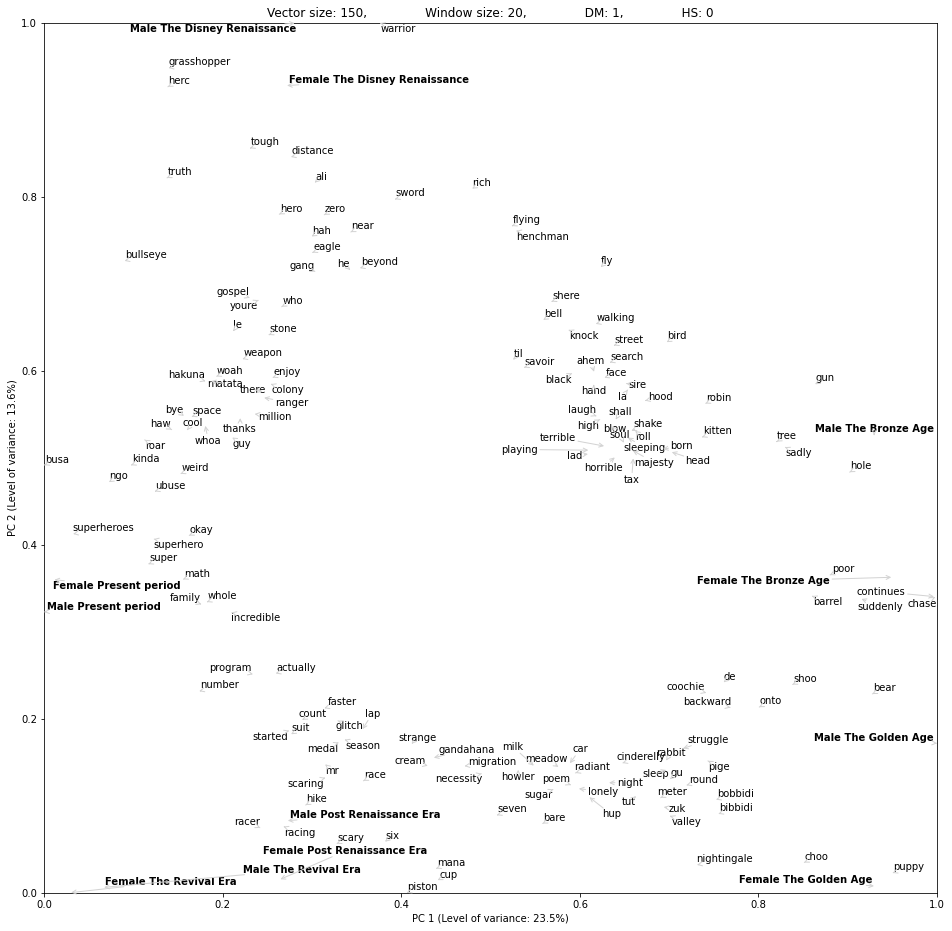

In [22]:
# plot the PCA (option 2)
X = get_doc_tags(model)
labels = np.array(list(model.dv.key_to_index))

pca, X_pca = perform_pca(model, X)
pca_expl_1, pca_expl_2 = pca_variance(pca)

plot_pca_2(model)

In [ ]:
# uncomment for model evaluation  (option 1)

# plot pcas for multiple models

# read in models
#models = []
#i = 0

# we use the same parameters as when we saved the models
#for vector_size in vector_sizes:
    
#    for window_size in window_sizes:
#        for dm in dms:
#            for hs in hss:
#                # read model
#                i += 1
#                filename = f"doc2vec_models/doc2vec_model_vs{vector_size}_ws{window_size}_dm{dm}_hs{hs}.npy"
#                model_eval = Doc2Vec.load(filename)
#                print(model_eval)
#                models.append(model_eval)
#                
#                print("plotting model ", i)
#                plot_pca_2(model_eval)
                
                
                

## Plot tags on axes 

In [42]:
# Save PCA model 
X = get_doc_tags(model)
labels = np.array(list(model.dv.key_to_index))
    
pca, X_pca = perform_pca(model, X)
pca_expl_1, pca_expl_2 = pca_variance(pca)

#X_axis = X_pca[:,0]
#Y_axis = X_pca[:,1]

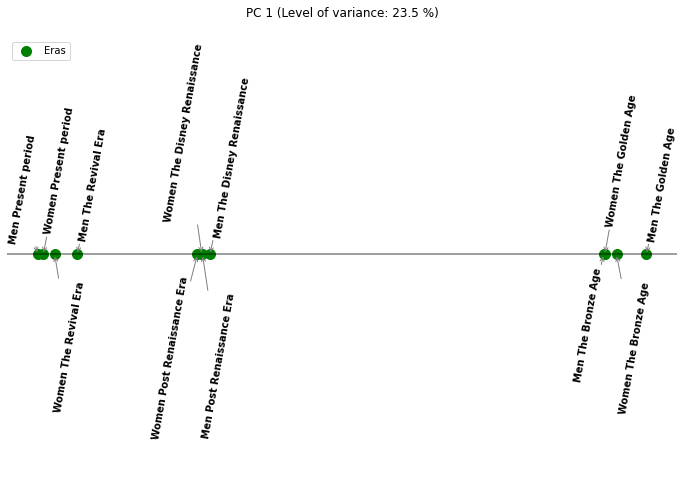

In [65]:
# PC 2 
x_axis = []
y_axis = []
for p, label in zip(X_pca, labels):
    x_axis.append(p[0])
    y_axis.append(0)
    
tags_ = np.column_stack((x_axis, y_axis))

fig, ax = plt.subplots(1, 1, figsize = (12,8))

ax.axhline(0, color = "black", alpha = 0.5)

ax.scatter(x_axis, y_axis, s=100, c='g', marker="o", label="Eras")

tag_texts = [plt.text(p[0], p[1], label, weight = "bold", rotation = 80)
                 for p, label in zip(tags_, labels)]

adjust_text(tag_texts, arrowprops=dict(arrowstyle="->", color='grey')) # This part is slow
 
ax.get_yaxis().set_visible(False)
fig.patch.set_visible(False)
ax.axis('off')

plt.legend(loc='upper left')
plt.title("PC 1 (Level of variance: 23.5 %)", pad = 20)
plt.savefig("analyse3/pc1.png")
plt.show()

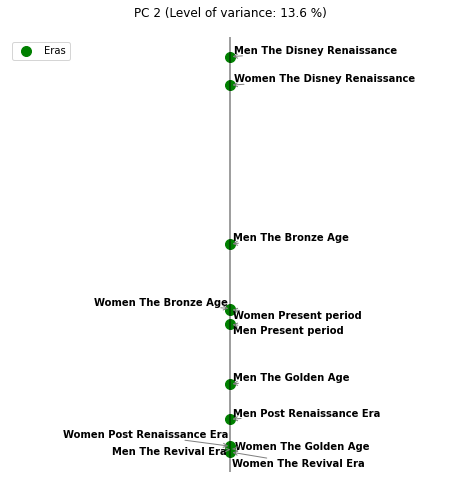

In [44]:
# PC 2 
x_axis = []
y_axis = []
for p, label in zip(X_pca, labels):
    x_axis.append(0)
    y_axis.append(p[1])
    
tags_ = np.column_stack((x_axis, y_axis))
axis_tags_ = np.column_stack(([-0, -0, -0], [0, 0.5, 1]))

fig, ax = plt.subplots(1, 1, figsize = (8,8))

ax.axvline(0, color = "black", alpha = 0.5)
ax.scatter(x_axis, y_axis, s=100, c='g', marker="o", label="Eras")

tag_texts = [plt.text(p[0], p[1], label, weight = "bold")
                 for p, label in zip(tags_, labels)]

adjust_text(tag_texts, arrowprops=dict(arrowstyle="->", color='grey')) # This part is slow
   
ax.get_yaxis().set_visible(False)
fig.patch.set_visible(False)
ax.axis('off')

plt.legend(loc='upper left')
plt.title("PC 2 (Level of variance: 13.6 %)", pad = 20)

plt.savefig("analyse3/pc2.png")
plt.show()


# Distances between tags
Calculate distances between men and women tags


Eucludistance in PCA

In [62]:
# distance in PCA function
import math
def calculateDistance(xy1,xy2):
    dist = math.sqrt((xy1[0] - xy2[0])**2 + (xy1[1] - xy2[1])**2)
    pc1_dist = abs(xy1[0] - xy2[0])
    pc2_dist = abs(xy1[1] - xy2[1])
    return dist, pc1_dist, pc2_dist

In [64]:
# Calculate eucludistance in PCA  between men and woman for all eras
men_cor, men_lab =  [],[]
women_cor, women_lab = [],[]

for p, label in zip(X_pca, labels):
    if "Men" in label:
        men_cor.append(p)
        men_lab.append(label)
    if "Women" in label:
        women_cor.append(p)
        women_lab.append(label)

i = -1
eras = []
eucludist = []
pc1_dists = []
pc2_dists = []
for tag in men_lab:
    i +=1
    dist, pc1_dist, pc2_dist = calculateDistance(men_cor[i], women_cor[i])
    eucludist.append(dist)
    pc1_dists.append(pc1_dist)
    pc2_dists.append(pc2_dist)
    eras.append(re.sub("Men ", "", tag))

eucludist_df = pd.DataFrame()
eucludist_df['Era'] = eras
eucludist_df['euclu_dist'] = eucludist
eucludist_df['pc1_dist'] = pc1_dists
eucludist_df['pc2_dist'] = pc2_dists
eucludist_df    

,Era,euclu_dist,pc1_dist,pc2_dist
0,The Golden Age,0.177940,0.068359,0.164285
1,The Bronze Age,0.164718,0.021336,0.163330
2,The Disney Renaissance,0.073176,0.012974,0.072017
3,Post Renaissance Era,0.068662,0.008167,0.068175
4,The Revival Era,0.037437,0.036939,0.006084
5,Present period,0.038379,0.009190,0.037263


In vector space --> kind of arbitrary (we do not know what causes the distances)

In [56]:
tags = all_scripts['tags'].unique()
tags_new = []
for tag in tags:
    tag = re.sub('Male', 'Men', tag)
    tag = re.sub('Female', 'Women', tag)
    tags_new.append(tag)
tags = tags_new

In [57]:
# Women and men tags 
tags_f = [x for x in tags if re.search("Women",x)]
tags_m = [x for x in tags if re.search("Men",x)]

model.wv.key_to_index.update(model.dv.key_to_index)
# distances between tags in vector space 
i = -1
for tag in tags_f:
    i +=1
    distance = model.wv.distance(tag, tags_m[i])
    print(tag, "to", tags_m[i], ": ", distance)

Women The Golden Age to Men The Golden Age :  0.8679110705852509
Women The Bronze Age to Men The Bronze Age :  0.8459557592868805
Women The Disney Renaissance to Men The Disney Renaissance :  0.89168381690979
Women Post Renaissance Era to Men Post Renaissance Era :  0.605548620223999
Women The Revival Era to Men The Revival Era :  0.6587724089622498
Women Present period to Men Present period :  0.5689248442649841


# Most similar words to tags

(i det ikke komprimerede rum (most_similar))

In [59]:
# print most similar words for all tags
model.wv.key_to_index.update(model.dv.key_to_index) # merge wv and dv 

i = 0
for tag in tags:
    i +=1
    x = [i[0] for i in model.wv.similar_by_word(tag, 30)]
    print(tag, x)    

Men The Golden Age ['hi', 'goodness', 'hum', 'thank', 'hunk', 'nice', 'ho', 'tasty', 'pardon', 'yoo', 'naughty', 'mister', 'diddle', 'ahh', 'helping', 'autograph', 'beetle', 'peanut', 'breathe', 'excuse', 'eaten', 'please', 'pegasus', 'wasting', 'poppycock', 'duh', 'link', 'sorry', 'gosh', 'deed']
Women The Golden Age ['back', 'pole', 'gotta', 'gonna', 'put', 'creep', 'go', 'flock', 'give', 'ahead', 'away', 'motor', 'nail', 'kee', 'take', 'leg', 'jump', 'breath', 'stick', 'longhorn', 'blown', 'steal', 'worm', 'safely', 'beak', 'dodge', 'come', 'landing', 'shot', 'throw']
Women The Bronze Age ['share', 'doesnt', 'figured', 'thing', 'gave', 'fault', 'tell', 'else', 'youd', 'confidence', 'havent', 'think', 'disappointed', 'anything', 'guess', 'freak', 'actually', 'someone', 'felt', 'didnt', 'depends', 'rotten', 'everything', 'ever', 'detail', 'anyone', 'wrong', 'reason', 'seemed', 'normally']
Men The Bronze Age ['let', 'get', 'come', 'gotta', 'home', 'back', 'heigh', 'ahead', 'false', 'jo

Most similar words in PCA

In [61]:
# find most similar words in pca to all tags 

n = 15 # n is the number of nearest words to each tag to extract.
#nearest_words_dict = {}
#for tag_p, tag_label in zip(X_pca, labels):
#    dists = [calculateDistance(tag_p, word_p) for word_p in normalized_word_X_pca]
#
#    argsort_dists = np.argsort(dists)
#
#    n_nearest_words  = normalized_word_X_pca[argsort_dists][:n]
#    n_nearest_labels = word_labels[argsort_dists][:n]
#
#    print(tag_label, n_nearest_labels)
#    nearest_words_dict[tag_label] = zip(n_nearest_words, n_nearest_labels)